In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets download -d samuelcortinhas/apples-or-tomatoes-image-classification

Dataset URL: https://www.kaggle.com/datasets/samuelcortinhas/apples-or-tomatoes-image-classification
License(s): CC0-1.0


In [ ]:
!unzip /content/apples-or-tomatoes-image-classification.zip

Archive:  /content/apples-or-tomatoes-image-classification.zip
  inflating: test/apples/img_p1_111.jpeg  
  inflating: test/apples/img_p1_121.jpeg  
  inflating: test/apples/img_p1_127.jpeg  
  inflating: test/apples/img_p1_131.jpeg  
  inflating: test/apples/img_p1_133.jpeg  
  inflating: test/apples/img_p1_139.jpeg  
  inflating: test/apples/img_p1_14.jpeg  
  inflating: test/apples/img_p1_143.jpeg  
  inflating: test/apples/img_p1_15.jpeg  
  inflating: test/apples/img_p1_16.jpeg  
  inflating: test/apples/img_p1_29.jpeg  
  inflating: test/apples/img_p1_30.jpeg  
  inflating: test/apples/img_p1_33.jpeg  
  inflating: test/apples/img_p1_34.jpeg  
  inflating: test/apples/img_p1_36.jpeg  
  inflating: test/apples/img_p1_50.jpeg  
  inflating: test/apples/img_p1_52.jpeg  
  inflating: test/apples/img_p1_55.jpeg  
  inflating: test/apples/img_p1_68.jpeg  
  inflating: test/apples/img_p1_7.jpeg  
  inflating: test/apples/img_p1_70.jpeg  
  inflating: test/apples/img_p1_74.jpeg  
  infla

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)
validation_ds = keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(256,256)
)

Found 294 files belonging to 2 classes.
Found 294 files belonging to 2 classes.


In [ ]:
def process(image,label):
    image = tf.cast(image/255. ,tf.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 60, 60, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds,epochs=30,validation_data=validation_ds)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.5489 - loss: 6.9268 - val_accuracy: 0.5646 - val_loss: 0.8369
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 105ms/step - accuracy: 0.7541 - loss: 3.1477 - val_accuracy: 0.5578 - val_loss: 5.7416
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.7501 - loss: 3.2725 - val_accuracy: 0.5578 - val_loss: 7.5259
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step - accuracy: 0.8279 - loss: 1.4312 - val_accuracy: 0.5578 - val_loss: 10.2957
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.8650 - loss: 2.0741 - val_accuracy: 0.5578 - val_loss: 14.2218
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 92ms/step - accuracy: 0.8741 - loss: 1.3607 - val_accuracy: 0.5578 - val_loss: 19.7992
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 131ms/step - accuracy: 0.8607 - loss: 1.2856 - val_accuracy: 0.5578 - val_loss: 15.9172
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 94ms/step - accuracy: 0.9086 - loss: 0.5180 - val_accuracy: 0.5

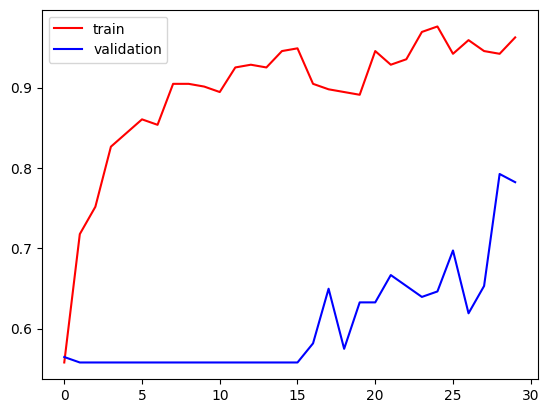

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

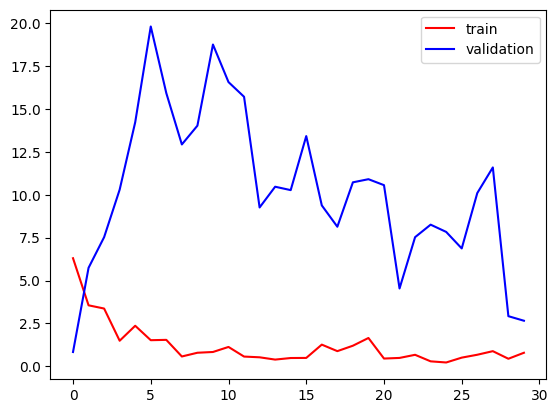

In [ ]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

array([[[255, 246, 255],
        [255, 248, 255],
        [255, 249, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 249, 255],
        [255, 249, 255],
        [255, 250, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[253, 254, 255],
        [253, 254, 255],
        [255, 254, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
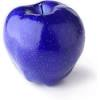

In [ ]:
import cv2

test_img = cv2.imread('/content/train/apples/img_p1_10.jpeg')
test_img

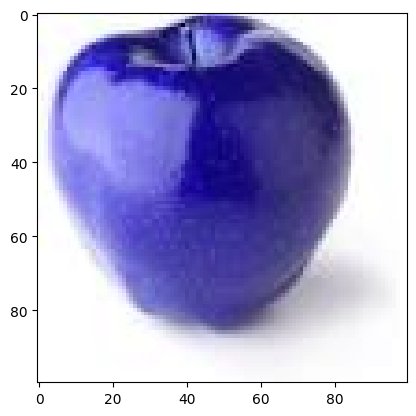

In [ ]:
plt.imshow(test_img)

In [ ]:
test_img.shape

(100, 100, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape((1,256,256,3))

In [ ]:
result = model.predict(test_input)
result

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 830ms/step


array([[1.]], dtype=float32)

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
if int(result[0][0]) == 0:
  print('The image is of an apple')
else:
  print('The image is of a tomato')

The image is of a tomato
